In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
#Hyperparameters::

coefficient_for_l2 = .002

In [5]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_official_languages_by_country_and_territory').text

In [6]:
soup = BeautifulSoup(website_url,'lxml')

In [7]:
table = soup.find('table',{'class':'wikitable'})

In [8]:
url='https://en.wikipedia.org/wiki/List_of_official_languages_by_country_and_territory'

df=pd.read_html(url, header=0)[1]
df.head()

,Country,Official language,Regional language,Minority language,National language,Widely spoken
0,Abkhazia[a],Abkhaz Russian,NaN,Georgian,Abkhaz,NaN
1,Afghanistan[1],Pashto Dari,Uzbek[b] Turkmen[b] Pashai[b] Nuristani[b] Bal...,NaN,NaN,NaN
2,Albania[2],Albanian,NaN,Greek Macedonian Aromanian,NaN,Italian
3,Algeria[3],Arabic Tamazight,NaN,NaN,Arabic Tamazight,French
4,Andorra,Catalan[4],NaN,Spanish French Portuguese,NaN,NaN


In [9]:
df = df[['Country','Official language','National language','Widely spoken']]

In [10]:
import re

#regex = re.compile('[^a-zA-Z]')

df['country'] = df['Country'].apply(lambda x: re.sub('[\(\[].*?[\)\]]', '', x))
df[['Official language','National language','Widely spoken']] = df[['Official language','National language','Widely spoken']].astype(str)
df['Official language'] = df['Official language'].apply(lambda x: '' if x == "nan" else x)
df['National language'] = df['National language'].apply(lambda x: '' if x == "nan" else x)
df['Widely spoken'] = df['Widely spoken'].apply(lambda x: '' if x == "nan" else x)
df['language'] = df[['Official language','National language','Widely spoken']].apply(lambda x: ' '.join(x), axis=1)
df['language'] = df['language'].apply(lambda x: re.sub('[\(\[].*?[\)\]]', '', x))

df = df[['country','language']]

In [11]:
df.head()

,country,language
0,Abkhazia,Abkhaz Russian Abkhaz
1,Afghanistan,Pashto Dari
2,Albania,Albanian Italian
3,Algeria,Arabic Tamazight Arabic Tamazight French
4,Andorra,Catalan


In [12]:
url2='https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'

df2=pd.read_html(url2, header=0)[3]

In [13]:
df2.head()

,Country or area,UN continentalregion[4],UN statisticalregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%


In [14]:
df2['country'] = df2['Country or area'].apply(lambda x: re.sub('[\(\[].*?[\)\]]', '', x))

In [15]:
df2['pop'] = df2['Population(1 July 2019)']
df2 = df2[['country','pop']]
df2.head(10)

,country,pop
0,China,1433783686
1,India,1366417754
2,United States,329064917
3,Indonesia,270625568
4,Pakistan,216565318
5,Brazil,211049527
6,Nigeria,200963599
7,Bangladesh,163046161
8,Russia,145872256
9,Mexico,127575529


In [16]:
url3='https://en.wikipedia.org/wiki/List_of_countries_by_population_growth_rate'

df3=pd.read_html(url3, header=0)[2]

In [17]:
df3.head()

,Country/ Region,WB[1]2009(%),CIA WF[2]2012(%),CIA WF[3]2014(%),UN[4]2005-10(%),UN[4]2010-15(%),UN[4]2015-20(%)
0,Afghanistan,2.4400,2.2900,2.29,2.7800,3.1600,2.4100
1,Albania,0.2600,0.3000,0.30,-0.9200,-0.1200,0.1300
2,Algeria,1.8900,1.8800,1.88,1.6300,1.9800,1.6700
3,Andorra,0.6300,0.1700,0.17,1.3700,-1.5900,-0.2100
4,Angola,3.1200,2.7800,2.78,3.5700,3.5200,3.2800


In [18]:
df3['country'] = df3['Country/ Region'].apply(lambda x: re.sub('[\(\[].*?[\)\]]', '', x))
df3.columns = ['country/region','2009','2012','2014','2005_10','2010_15','2015_20','country']
df3 = df3[['country','2005_10','2010_15','2015_20']]
df3.head()

,country,2005_10,2010_15,2015_20
0,Afghanistan,2.7800,3.1600,2.4100
1,Albania,-0.9200,-0.1200,0.1300
2,Algeria,1.6300,1.9800,1.6700
3,Andorra,1.3700,-1.5900,-0.2100
4,Angola,3.5700,3.5200,3.2800


In [19]:
df4 = df.set_index('country').join(df2.set_index('country'))
df4 = df4.join(df3.set_index('country'))
df4 = df4[~df4['pop'].isnull()]
df4 = df4.reset_index()

In [20]:
df4[df4.language == '']

,country,language,pop,2005_10,2010_15,2015_20


In [21]:
df4

,country,language,pop,2005_10,2010_15,2015_20
0,Afghanistan,Pashto Dari,38041754.0000,2.7800,3.1600,2.4100
1,Albania,Albanian Italian,2880917.0000,-0.9200,-0.1200,0.1300
2,Algeria,Arabic Tamazight Arabic Tamazight French,43053054.0000,1.6300,1.9800,1.6700
3,Andorra,Catalan,77142.0000,1.3700,-1.5900,-0.2100
4,Angola,Portuguese Kimbundu Umbundu Kikongo Chokwe Kwa...,31825295.0000,3.5700,3.5200,3.2800
...,...,...,...,...,...,...
189,Venezuela,Spanish Venezuelan Sign Language,28515829.0000,1.6100,1.4100,1.2600
190,Vietnam,Vietnamese,96462106.0000,0.9600,1.1200,1.0000
191,Yemen,Arabic,29161922.0000,2.7400,2.6200,2.3300
192,Zambia,English,17861030.0000,2.7800,3.0100,2.9700


In [22]:
languages = pd.read_csv('languages.csv',header=None)
languages = languages[0]
languages = languages.apply(lambda x: re.sub('[\(\[].*?[\)\]]', '', x))
languages = languages.tolist()

languages

['Mandarin Chinese',
 'English',
 'Hindustani ',
 'Spanish',
 'Arabic',
 'Malay ',
 'Russian',
 'Bengali',
 'Portuguese',
 'French',
 'Hausa',
 'Punjabi',
 'Japanese',
 'German',
 'Persian',
 'Swahili',
 'Telugu',
 'Javanese',
 'Wu Chinese ',
 'Korean',
 'Tamil',
 'Cantonese',
 'Turkish',
 'Vietnamese',
 'Italian']

In [23]:
languages[0] = 'Mandarin'
languages[2] = 'Hindi'

In [24]:
df4[df4.language.str.contains('Telugu')]

,country,language,pop,2005_10,2010_15,2015_20


In [25]:
df4.count() #need to deal with nan growth rates

country     194
language    194
pop         194
2005_10     191
2010_15     191
2015_20     190
dtype: int64

In [26]:
for lang in languages:
    print(lang + ": " + str(len(df4[df4.language.str.contains(lang)])))
# need to deal with languages with 0 countries speaking them
# potential solution: combine official languages with national and widely spoken languages
# also need to deal with dialects of Chinese -- combine Mandarin with Wu Chinese?
# Telugu ?

Mandarin: 3
English: 64
Hindi: 2
Spanish: 20
Arabic: 29
Malay : 3
Russian: 8
Bengali: 1
Portuguese: 10
French: 30
Hausa: 2
Punjabi: 1
Japanese: 1
German: 7
Persian: 2
Swahili: 5
Telugu: 0
Javanese: 1
Wu Chinese : 0
Korean: 2
Tamil: 2
Cantonese: 2
Turkish: 2
Vietnamese: 2
Italian: 7


In [27]:
# For each of the language, get countries that speak that langauge (df4.language.str.contains(lang), sort, 
# and pick the first row, then append to a larger df

data = pd.DataFrame()
unique_countries = []

for lang in languages:
    temp = df4[df4.language.str.contains(lang)]
    #print(temp)
    if len(temp) != 0:
        temp = temp.sort_values(by='pop',ascending=False)
        for c in temp['country']:
            if c in unique_countries:
                print(c)
                temp = temp[temp['country'] != c]
        temp['lang'] = lang
        data = data.append(temp.iloc[:2])
        unique_countries = data['country'].tolist()

India
Philippines
Iran
Singapore


In [28]:
data = data.reset_index()
data = data[['country','lang','language','pop','2005_10','2010_15','2015_20']]
data[['2005_10','2010_15','2015_20']] = data[['2005_10','2010_15','2015_20']] / 100
data['capacity'] = data['pop']*1.5
data.loc[data['country'] == 'Hong Kong','2015_20'] = (0.83 / 100)
data.loc[data['country'] == 'Macau','2015_20'] = (1.69 / 100)

data

,country,lang,language,pop,2005_10,2010_15,2015_20,capacity
0,China,Mandarin,Mandarin,1433783686.0000,0.0057,0.0054,0.0039,2150675529.0000
1,Taiwan,Mandarin,Mandarin Formosan languages Hakka Mandarin Ta...,23773876.0000,0.0044,0.0033,0.0028,35660814.0000
2,India,English,Hindi English,1366417754.0000,0.0146,0.0123,0.0110,2049626631.0000
3,United States,English,English,329064917.0000,0.0090,0.0072,0.0071,493597375.5000
4,Fiji,Hindi,English Fijian Fiji Hindi,889953.0000,0.0091,0.0074,0.0072,1334929.5000
5,Mexico,Spanish,Spanish,127575529.0000,0.0157,0.0141,0.0123,191363293.5000
6,Philippines,Spanish,English Filipino Filipino Sign Language Filipi...,108116615.0000,0.0166,0.0164,0.0151,162174922.5000
7,Egypt,Arabic,Arabic,100388073.0000,0.0182,0.0218,0.0187,150582109.5000
8,Iran,Arabic,Persian Persian Persian Arabic,82913906.0000,0.0114,0.0125,0.0104,124370859.0000
9,Malaysia,Malay,Malay,31949777.0000,0.0183,0.0178,0.0135,47924665.5000


In [29]:
# For each of the unique country, need to:
# run a regression model to get r(t), 
# double the population to get carrying capacity
# then run a logistic growth model to get pop in 50yrs
# then group by language (sum the pop if countries are different) 

import sklearn
from sklearn.linear_model import LinearRegression

coeffs = []
intercepts = []

X = np.array([0,5,10]).reshape(-1,1)
for _, row in data.iterrows():
    y = np.array(row[['2005_10','2010_15','2015_20']])
    reg = LinearRegression().fit(X, y)
    coeffs.append(reg.coef_[0])
    intercepts.append(reg.intercept_)

data['r_coef'] = coeffs
data['r_intercept'] = intercepts

data

,country,lang,language,pop,2005_10,2010_15,2015_20,capacity,r_coef,r_intercept
0,China,Mandarin,Mandarin,1433783686.0000,0.0057,0.0054,0.0039,2150675529.0000,-0.0002,0.0059
1,Taiwan,Mandarin,Mandarin Formosan languages Hakka Mandarin Ta...,23773876.0000,0.0044,0.0033,0.0028,35660814.0000,-0.0002,0.0043
2,India,English,Hindi English,1366417754.0000,0.0146,0.0123,0.0110,2049626631.0000,-0.0004,0.0144
3,United States,English,English,329064917.0000,0.0090,0.0072,0.0071,493597375.5000,-0.0002,0.0087
4,Fiji,Hindi,English Fijian Fiji Hindi,889953.0000,0.0091,0.0074,0.0072,1334929.5000,-0.0002,0.0089
5,Mexico,Spanish,Spanish,127575529.0000,0.0157,0.0141,0.0123,191363293.5000,-0.0003,0.0157
6,Philippines,Spanish,English Filipino Filipino Sign Language Filipi...,108116615.0000,0.0166,0.0164,0.0151,162174922.5000,-0.0001,0.0168
7,Egypt,Arabic,Arabic,100388073.0000,0.0182,0.0218,0.0187,150582109.5000,0.0001,0.0193
8,Iran,Arabic,Persian Persian Persian Arabic,82913906.0000,0.0114,0.0125,0.0104,124370859.0000,-0.0001,0.0119
9,Malaysia,Malay,Malay,31949777.0000,0.0183,0.0178,0.0135,47924665.5000,-0.0005,0.0189


In [30]:
# discrete logistic growth:
# n[t+1] = (1+r[t](1 - n[t]/K))*n[t]

#data[['pop','capacity']] = data #represent pop in million units
pop_in_50_yrs = []



def logistic_growth(n,r,k):
    return (1 + r*(1-n/k))*n

for _, row in data[['pop','capacity','r_coef','r_intercept']].iterrows():
    row[['pop','capacity']] =  row[['pop','capacity']] / (10**3)
    n = row['pop']
    k = row['capacity']
    r_coef = row['r_coef']
    r_intercept = row['r_intercept']
    
    for t in range(11,61,5):
        r_t = r_coef*t + r_intercept
        n = logistic_growth(n,r_t,k)
        if n<0: n=0

    pop_in_50_yrs.append(n)
    
pop_50 = [i * (10**3) for i in pop_in_50_yrs]

In [31]:
data['pop_in_50'] = pop_50
data

,country,lang,language,pop,2005_10,2010_15,2015_20,capacity,r_coef,r_intercept,pop_in_50
0,China,Mandarin,Mandarin,1433783686.0000,0.0057,0.0054,0.0039,2150675529.0000,-0.0002,0.0059,1433167611.3796
1,Taiwan,Mandarin,Mandarin Formosan languages Hakka Mandarin Ta...,23773876.0000,0.0044,0.0033,0.0028,35660814.0000,-0.0002,0.0043,23689811.6173
2,India,English,Hindi English,1366417754.0000,0.0146,0.0123,0.0110,2049626631.0000,-0.0004,0.0144,1377209458.2658
3,United States,English,English,329064917.0000,0.0090,0.0072,0.0071,493597375.5000,-0.0002,0.0087,331636620.0485
4,Fiji,Hindi,English Fijian Fiji Hindi,889953.0000,0.0091,0.0074,0.0072,1334929.5000,-0.0002,0.0089,897300.7759
5,Mexico,Spanish,Spanish,127575529.0000,0.0157,0.0141,0.0123,191363293.5000,-0.0003,0.0157,129412041.6788
6,Philippines,Spanish,English Filipino Filipino Sign Language Filipi...,108116615.0000,0.0166,0.0164,0.0151,162174922.5000,-0.0001,0.0168,112276852.9624
7,Egypt,Arabic,Arabic,100388073.0000,0.0182,0.0218,0.0187,150582109.5000,0.0001,0.0193,107176953.3715
8,Iran,Arabic,Persian Persian Persian Arabic,82913906.0000,0.0114,0.0125,0.0104,124370859.0000,-0.0001,0.0119,85254852.4532
9,Malaysia,Malay,Malay,31949777.0000,0.0183,0.0178,0.0135,47924665.5000,-0.0005,0.0189,32253202.9374


In [32]:
## maybe try cublic spine** either that or get more data

In [33]:
data['avg_r'] = np.mean(data[['2005_10','2010_15','2015_20']],axis=1)
data

,country,lang,language,pop,2005_10,2010_15,2015_20,capacity,r_coef,r_intercept,pop_in_50,avg_r
0,China,Mandarin,Mandarin,1433783686.0000,0.0057,0.0054,0.0039,2150675529.0000,-0.0002,0.0059,1433167611.3796,0.0050
1,Taiwan,Mandarin,Mandarin Formosan languages Hakka Mandarin Ta...,23773876.0000,0.0044,0.0033,0.0028,35660814.0000,-0.0002,0.0043,23689811.6173,0.0035
2,India,English,Hindi English,1366417754.0000,0.0146,0.0123,0.0110,2049626631.0000,-0.0004,0.0144,1377209458.2658,0.0126
3,United States,English,English,329064917.0000,0.0090,0.0072,0.0071,493597375.5000,-0.0002,0.0087,331636620.0485,0.0078
4,Fiji,Hindi,English Fijian Fiji Hindi,889953.0000,0.0091,0.0074,0.0072,1334929.5000,-0.0002,0.0089,897300.7759,0.0079
5,Mexico,Spanish,Spanish,127575529.0000,0.0157,0.0141,0.0123,191363293.5000,-0.0003,0.0157,129412041.6788,0.0140
6,Philippines,Spanish,English Filipino Filipino Sign Language Filipi...,108116615.0000,0.0166,0.0164,0.0151,162174922.5000,-0.0001,0.0168,112276852.9624,0.0160
7,Egypt,Arabic,Arabic,100388073.0000,0.0182,0.0218,0.0187,150582109.5000,0.0001,0.0193,107176953.3715,0.0196
8,Iran,Arabic,Persian Persian Persian Arabic,82913906.0000,0.0114,0.0125,0.0104,124370859.0000,-0.0001,0.0119,85254852.4532,0.0114
9,Malaysia,Malay,Malay,31949777.0000,0.0183,0.0178,0.0135,47924665.5000,-0.0005,0.0189,32253202.9374,0.0165


In [34]:
pop_in_50_yrs = []
pop_increase_by_year = []


create_list_dict = True
#to create the size of the list that will contain a dictionary of L1 speakers for each year

for _, row in data[['country', 'pop','capacity','avg_r']].iterrows():
    #row[['pop','capacity']] =  row[['pop','capacity']] / (10**3)
    n = (row['pop'] / float(10**3))
    k = (row['capacity'] / float(10**3))
    #r_coef = row['r_coef']
    #r_intercept = row['r_intercept']
    r = row['avg_r']
    
    
    if create_list_dict:
        pop_increase_by_year.append({row['country']: n * float(10**3)})
    else:
        pop_increase_by_year[0][row['country']] = n * float(10**3)
    
    for t in range(11,61,1):
        #r_t = r_coef*t + r_intercept
        n = logistic_growth(n,r,k)
        if n<0: n=0
        if create_list_dict:
            pop_increase_by_year.append({row['country']: n * float(10**3)})
        else:
            pop_increase_by_year[t-11][row['country']] = n * float(10**3)
            
        
    create_list_dict = False

    pop_in_50_yrs.append(n)
    
pop_50 = [i * float(10**3) for i in pop_in_50_yrs]
data['pop_in_50_const_r'] = pop_50

data[['pop','capacity','pop','pop_in_50_const_r']] = data[['pop','capacity','pop','pop_in_50_const_r']].astype(int)
data

,country,lang,language,pop,2005_10,2010_15,2015_20,capacity,r_coef,r_intercept,pop_in_50,avg_r,pop_in_50_const_r
0,China,Mandarin,Mandarin,1433783686,0.0057,0.0054,0.0039,-2147483648,-0.0002,0.0059,1433167611.3796,0.0050,1548021360
1,Taiwan,Mandarin,Mandarin Formosan languages Hakka Mandarin Ta...,23773876,0.0044,0.0033,0.0028,35660814,-0.0002,0.0043,23689811.6173,0.0035,25118896
2,India,English,Hindi English,1366417754,0.0146,0.0123,0.0110,2049626631,-0.0004,0.0144,1377209458.2658,0.0126,1619796286
3,United States,English,English,329064917,0.0090,0.0072,0.0071,493597375,-0.0002,0.0087,331636620.0485,0.0078,368664271
4,Fiji,Hindi,English Fijian Fiji Hindi,889953,0.0091,0.0074,0.0072,1334929,-0.0002,0.0089,897300.7759,0.0079,998734
5,Mexico,Spanish,Spanish,127575529,0.0157,0.0141,0.0123,191363293,-0.0003,0.0157,129412041.6788,0.0140,153422326
6,Philippines,Spanish,English Filipino Filipino Sign Language Filipi...,108116615,0.0166,0.0164,0.0151,162174922,-0.0001,0.0168,112276852.9624,0.0160,132541626
7,Egypt,Arabic,Arabic,100388073,0.0182,0.0218,0.0187,150582109,0.0001,0.0193,107176953.3715,0.0196,126856868
8,Iran,Arabic,Persian Persian Persian Arabic,82913906,0.0114,0.0125,0.0104,124370859,-0.0001,0.0119,85254852.4532,0.0114,97022630
9,Malaysia,Malay,Malay,31949777,0.0183,0.0178,0.0135,47924665,-0.0005,0.0189,32253202.9374,0.0165,39346807


In [46]:
#Not necessary just refreshing my existence



language_speakers_in_50 = []
for i in range(39):
    language_speakers_in_50.append( (data.loc[i, 'lang'] ,data.loc[i, 'pop_in_50_const_r']))
language_speakers_in_50[0]
#but good for easy data access

('Mandarin', 1548021360)

In [47]:
#for _, row in data[['country', 'pop','capacity','avg_r']].iterrows():
   # print (row['country'])##

In [81]:
print (pop_increase_by_year[45].keys())

dict_keys(['China', 'Taiwan', 'India', 'United States', 'Fiji', 'Mexico', 'Philippines', 'Egypt', 'Iran', 'Malaysia', 'Singapore', 'Russia', 'Kazakhstan', 'Bangladesh', 'Brazil', 'Angola', 'France', 'Algeria', 'Nigeria', 'Niger', 'Pakistan', 'Japan', 'Germany', 'Belgium', 'Kuwait', 'Tanzania', 'Kenya', 'Indonesia', 'South Korea', 'North Korea', 'Sri Lanka', 'Hong Kong', 'Macau', 'Turkey', 'Cyprus', 'Vietnam', 'Czech Republic', 'Italy', 'Switzerland'])


In [8]:
graph = nx.Graph()
countries_i_need = pop_increase_by_year[0].keys()

NameError: name 'nx' is not defined

In [48]:
"""
Could I make a class? 
Just consider each object contains name ie its language
and a list of countries that speak it (official language)

actually better idea just make a list of continents that speak that language. 
Automatically give the weight +.5 for each continent in common


Later we can piss around with trying to make it more robust in regards to allowing for a distance metric...

Then throw each object into the network. then as do a loop in the network of each node and say if that and any other nodes contain 







ACTUAL MOVEMENT OF GRAPH
I have country[size]... now i need
how close country...
I now have how close country...

the next layer of L2 speakers of a language is [.01* sum(How close country * country[size])]
"""

"""
OVERALL PLAN
ok so essentially the plan is SIMPLE

first we create graph with objects containing the name of the language, & list of countries with it as primary language.
THEN create a graph linking each 2 countries distance

update each node's L2 size by summing how f(distance) *country[size] into new network

then iterate back for 50 times

now we have L_2 for each of those languages...
I guess just sum them to percentages of each country's L_1 of a given language? maybe ill do some spaghetti bullshit for now but soon enough it should work...

then we sum those L_2 with the L_1 for each country's 50 year estimate to get overall langauge extension...
"""

languages = {
    "Mandarin": "China",
    "English": "United States",
    "Hindi": "India",
    "Spanish": "Mexico",
    "Arabic": "Egypt",
    "Malay": "Indonesia",
    "Russian": "Russia",
    "Bengali": "Bangladesh",
    "Portuguese": "Brazil",
    "French": "France",
    "Hausa": "Nigeria",
    "Punjabi": "Pakistan",
    "Javanese": "Indonesia",
    "Japanese": "Japan",
    "German": "Germany",
    "Persian": "Iran",
    "Swahili": "Tanzania",
    "Telugo": "India",
    "Korean": "South Korea",
    "Tamil": "India",
    "Marathi": "India",
    "Turkish": "Turkey",
    "Vietnamese": "Vietnam",
    "Italian": "Italy",
    "Telugu": "India"
    
    
    
}





In [16]:

#webscraper for stuff


import selenium
from selenium import webdriver
import re
#So essentially im using a dictionary as a data structure to keep my "value" of language interactions in an easily verifiable system.

#loop thru and find the distance for each country pair i.e language pair...
#Then add this to graph
keys= list(languages.keys())
language_pairs = []
for i in range(len(keys)):
    for j in range(i, len(keys)):
        language_pairs.append((languages[keys[i]], languages[keys[j]]))
        



#So now we have all of our tuples of languages, lets throw their value into a dictionary...


driver = webdriver.Chrome(executable_path='C:/Program Files/chromedriver.exe')


diplomacy_factor = {}
for x in language_pairs:
    driver.get('https://distancecalculator.globefeed.com/Distance_Between_Countries.asp')
    if x[0] == x[1]:
        diplomacy_factor[x] = 0
        continue
    country1 = driver.find_element_by_id('placename1')
    country2 = driver.find_element_by_id('placename2')
    country1.send_keys(x[0])
    country2.send_keys(x[1])
    login_button = driver.find_element_by_xpath("/html/body/div/div[1]/div[1]/div/div[2]/div[1]/div/button").click()
    
    distance = driver.find_element_by_id('straightDist')
    thying = distance.text
    
    overalldistance =  distance.text
    if len(re.findall(r"Kilometers: (\d*[.]\d+)",overalldistance)) == 0:
        diplomacy_factor[x] = 0
    else:
        diplomacy_factor[x] = float(re.findall(r"Kilometers: (\d*[.]\d+)",overalldistance)[0])
        #print(re.findall(r"Kilometers: (\d*[.]\d+)",overalldistance)[0])
    
    #driver.close()
    
driver.quit()

#THEN we build the actual model...




In [55]:
#Scrapped project, well, more like basic thing to fix it.

"""

import selenium
from selenium import webdriver

# Using Chrome to access web
#driver = webdriver.Chrome()

driver = webdriver.Chrome(executable_path='C:/Program Files/chromedriver.exe')
print ("Hello")
# Open the website
driver.get('https://distancecalculator.globefeed.com/Distance_Between_Countries.asp')
driver.get('https://google.com')

country1 = driver.find_element_by_id('placename1')
country2 = driver.find_element_by_id('placename2')
country1.send_keys("Peru")#(item1)
country2.send_keys("Canada")#(item1)


#login_button = driver.find_element_by_name('button')
login_button = driver.find_element_by_xpath("/html/body/div/div[1]/div[1]/div/div[2]/div[1]/div/button").click()

distance = driver.find_element_by_id('straightDist')
thying = distance.text

#This allows me to recieve the physical distance from countries...
#Should i make a network that actually just takes all necessary countries and creates a fully connected graph with their respective distances as weightss?>
"""

'\n\nimport selenium\nfrom selenium import webdriver\n\n# Using Chrome to access web\n#driver = webdriver.Chrome()\n\ndriver = webdriver.Chrome(executable_path=\'C:/Program Files/chromedriver.exe\')\nprint ("Hello")\n# Open the website\ndriver.get(\'https://distancecalculator.globefeed.com/Distance_Between_Countries.asp\')\ndriver.get(\'https://google.com\')\n\ncountry1 = driver.find_element_by_id(\'placename1\')\ncountry2 = driver.find_element_by_id(\'placename2\')\ncountry1.send_keys("Peru")#(item1)\ncountry2.send_keys("Canada")#(item1)\n\n\n#login_button = driver.find_element_by_name(\'button\')\nlogin_button = driver.find_element_by_xpath("/html/body/div/div[1]/div[1]/div/div[2]/div[1]/div/button").click()\n\ndistance = driver.find_element_by_id(\'straightDist\')\nthying = distance.text\n\n#This allows me to recieve the physical distance from countries...\n#Should i make a network that actually just takes all necessary countries and creates a fully connected graph with their respec

In [49]:
import re
overalldistance =  distance.text

NameError: name 'distance' is not defined

In [50]:
#This is my scraped data. Don't mess with it bc then i'll have to run a bunch of stuff for it again...

my_idea = {('China', 'China'): 0, ('China', 'United States'): 11646.7, ('China', 'India'): 2983.65, ('China', 'Mexico'): 12825.73, ('China', 'Egypt'): 6882.46, ('China', 'Indonesia'): 4197.92, ('China', 'Russia'): 2854.48, ('China', 'Bangladesh'): 1897.77, ('China', 'Brazil'): 16632.05, ('China', 'France'): 8021.61, ('China', 'Nigeria'): 9908.38, ('China', 'Pakistan'): 3284.45, ('China', 'Japan'): 3046.61, ('China', 'Germany'): 7223.54, ('China', 'Iran'): 4612.09, ('China', 'Tanzania'): 8596.39, ('China', 'South Korea'): 2118.26, ('China', 'Turkey'): 5949.59, ('China', 'Vietnam'): 2458.28, ('China', 'Italy'): 7565.9, ('United States', 'United States'): 0, ('United States', 'India'): 13576.02, ('United States', 'Mexico'): 1632.45, ('United States', 'Egypt'): 10975.88, ('United States', 'Indonesia'): 14961.09, ('United States', 'Russia'): 8885.66, ('United States', 'Bangladesh'): 13226.7, ('United States', 'Brazil'): 7316.57, ('United States', 'France'): 7665.22, ('United States', 'Nigeria'): 10648.65, ('United States', 'Pakistan'): 12352.97, ('United States', 'Japan'): 10149.95, ('United States', 'Germany'): 7861.09, ('United States', 'Iran'): 11657.33, ('United States', 'Tanzania'): 13970.93, ('United States', 'South Korea'): 10742.13, ('United States', 'Turkey'): 10181.16, ('United States', 'Vietnam'): 13797.25, ('United States', 'Italy'): 8618.64, ('India', 'India'): 0, ('India', 'Mexico'): 15093.67, ('India', 'Egypt'): 4923.32, ('India', 'Indonesia'): 4484.78, ('India', 'Russia'): 4985.43, ('India', 'Bangladesh'): 1222.27, ('India', 'Brazil'): 14774.6, ('India', 'France'): 7368.55, ('India', 'Nigeria'): 7610.96, ('India', 'Pakistan'): 1452.78, ('India', 'Japan'): 5959.02, ('India', 'Germany'): 6751.86, ('India', 'Iran'): 2827.62, ('India', 'Tanzania'): 5670.33, ('India', 'South Korea'): 5016.47, ('India', 'Turkey'): 4630.95, ('India', 'Vietnam'): 3190.14, ('India', 'Italy'): 6568.72, ('Mexico', 'Mexico'): 0, ('Mexico', 'Egypt'): 12493.03, ('Mexico', 'Indonesia'): 15334.5, ('Mexico', 'Russia'): 10221.99, ('Mexico', 'Bangladesh'): 14571.29, ('Mexico', 'Brazil'): 6927.95, ('Mexico', 'France'): 9189.67, ('Mexico', 'Nigeria'): 11710.89, ('Mexico', 'Pakistan'): 13946.9, ('Mexico', 'Japan'): 10797.61, ('Mexico', 'Germany'): 9447.11, ('Mexico', 'Iran'): 13289.56, ('Mexico', 'Tanzania'): 15083.13, ('Mexico', 'India'): 15093.67, ('Mexico', 'South Korea'): 11542.33, ('Mexico', 'Turkey'): 11785.6, ('Mexico', 'Vietnam'): 14647.86, ('Mexico', 'Italy'): 10147.29, ('Egypt', 'Egypt'): 0, ('Egypt', 'Indonesia'): 9364.47, ('Egypt', 'Russia'): 6596.05, ('Egypt', 'Bangladesh'): 5944.26, ('Egypt', 'Brazil'): 10016.31, ('Egypt', 'France'): 3311.6, ('Egypt', 'Nigeria'): 3050.22, ('Egypt', 'Pakistan'): 3765.53, ('Egypt', 'Japan'): 9684.79, ('Egypt', 'Germany'): 3204.36, ('Egypt', 'Iran'): 2293.02, ('Egypt', 'Tanzania'): 3716.49, ('Egypt', 'India'): 4923.32, ('Egypt', 'South Korea'): 8873.64, ('Egypt', 'Turkey'): 1411.9, ('Egypt', 'Vietnam'): 8083.69, ('Egypt', 'Italy'): 2357.27, ('Indonesia', 'Indonesia'): 0, ('Indonesia', 'Russia'): 6967.11, ('Indonesia', 'Bangladesh'): 0, ('Indonesia', 'Brazil'): 17729.71, ('Indonesia', 'France'): 11720.97, ('Indonesia', 'Nigeria'): 11694.69, ('Indonesia', 'Pakistan'): 5847.46, ('Indonesia', 'Japan'): 4821.39, ('Indonesia', 'Germany'): 11010.01, ('Indonesia', 'Iran'): 7304.37, ('Indonesia', 'Tanzania'): 8785.41, ('Indonesia', 'India'): 4484.78, ('Indonesia', 'South Korea'): 4324.95, ('Indonesia', 'Turkey'): 9086.66, ('Indonesia', 'Vietnam'): 1764.02, ('Indonesia', 'Italy'): 11003.53, ('Russia', 'Russia'): 0, ('Russia', 'Bangladesh'): 4358.74, ('Russia', 'Brazil'): 14450.82, ('Russia', 'France'): 6220.83, ('Russia', 'Nigeria'): 9469.49, ('Russia', 'Pakistan'): 4334.03, ('Russia', 'Japan'): 3628.8, ('Russia', 'Germany'): 5420.43, ('Russia', 'Iran'): 4875.54, ('Russia', 'Tanzania'): 9616.88, ('Russia', 'India'): 4985.43, ('Russia', 'South Korea'): 3252.93, ('Russia', 'Turkey'): 5251.22, ('Russia', 'Vietnam'): 5283.02, ('Russia', 'Italy'): 6145.73, ('Bangladesh', 'Bangladesh'): 0, ('Bangladesh', 'Brazil'): 15924.51, ('Bangladesh', 'France'): 7995.01, ('Bangladesh', 'Nigeria'): 8761.68, ('Bangladesh', 'Pakistan'): 2205.71, ('Bangladesh', 'Japan'): 4768.4, ('Bangladesh', 'Germany'): 7290.76, ('Bangladesh', 'Iran'): 3707.17, ('Bangladesh', 'Tanzania'): 6880.13, ('Bangladesh', 'India'): 1222.27, ('Bangladesh', 'South Korea'): 3828.93, ('Bangladesh', 'Turkey'): 5416.06, ('Bangladesh', 'Vietnam'): 2164.82, ('Bangladesh', 'Italy'): 7299.23, ('Brazil', 'Brazil'): 0, ('Brazil', 'France'): 8624.88, ('Brazil', 'Nigeria'): 7167.98, ('Brazil', 'Pakistan'): 13781.54, ('Brazil', 'Japan'): 17369.59, ('Brazil', 'Germany'): 9431.19, ('Brazil', 'Iran'): 12299.06, ('Brazil', 'Tanzania'): 9491.65, ('Brazil', 'India'): 14774.6, ('Brazil', 'South Korea'): 17604.14, ('Brazil', 'Turkey'): 10756.71, ('Brazil', 'Vietnam'): 17880.16, ('Brazil', 'Italy'): 9069.19, ('France', 'France'): 0, ('France', 'Nigeria'): 4175.78, ('France', 'Pakistan'): 5930.76, ('France', 'Japan'): 9849.63, ('France', 'Germany'): 815.79, ('France', 'Iran'): 4595.46, ('France', 'Tanzania'): 6681.53, ('France', 'India'): 7368.55, ('France', 'South Korea'): 9383.73, ('France', 'Turkey'): 2798.73, ('France', 'Vietnam'): 10072.58, ('France', 'Italy'): 957.61, ('Nigeria', 'Nigeria'): 0, ('Nigeria', 'Pakistan'): 6692.53, ('Nigeria', 'Japan'): 12729.29, ('Nigeria', 'Germany'): 4682.1, ('Nigeria', 'Iran'): 5296.3, ('Nigeria', 'Tanzania'): 3374.94, ('Nigeria', 'India'): 7610.96, ('Nigeria', 'South Korea'): 11923.46, ('Nigeria', 'Turkey'): 4246.18, ('Nigeria', 'Vietnam'): 10782.6, ('Nigeria', 'Italy'): 3665.8, ('Pakistan', 'Pakistan'): 0, ('Pakistan', 'Japan'): 6303.07, ('Pakistan', 'Germany'): 5300.53, ('Pakistan', 'Iran'): 1501.93, ('Pakistan', 'Tanzania'): 5491.81, ('Pakistan', 'India'): 1452.78, ('Pakistan', 'South Korea'): 5393.83, ('Pakistan', 'Turkey'): 3240.02, ('Pakistan', 'Vietnam'): 4369.74, ('Pakistan', 'Italy'): 5160.34, ('Japan', 'Japan'): 0, ('Japan', 'Germany'): 9047.98, ('Japan', 'Iran'): 7515.16, ('Japan', 'Tanzania'): 11622.61, ('Japan', 'India'): 5959.02, ('Japan', 'South Korea'): 942.71, ('Japan', 'Turkey'): 8527.3, ('Japan', 'Vietnam'): 3865.24, ('Japan', 'Italy'): 9728.23, ('Germany', 'Germany'): 0, ('Germany', 'Iran'): 4064.23, ('Germany', 'Tanzania'): 6810.58, ('Germany', 'India'): 6751.86, ('Germany', 'South Korea'): 8569.27, ('Germany', 'Turkey'): 2354.6, ('Germany', 'Vietnam'): 9327.98, ('Germany', 'Italy'): 1045.85, ('Iran', 'Iran'): 0, ('Iran', 'Tanzania'): 4750.55, ('Iran', 'India'): 2827.62, ('Iran', 'South Korea'): 6656.42, ('Iran', 'Turkey'): 1812.82, ('Iran', 'Vietnam'): 5870.07, ('Iran', 'Italy'): 3753.38, ('Tanzania', 'Tanzania'): 0, ('Tanzania', 'India'): 5670.33, ('Tanzania', 'South Korea'): 10680.28, ('Tanzania', 'Turkey'): 5040.66, ('Tanzania', 'Vietnam'): 8406.11, ('Tanzania', 'Italy'): 5823.11, ('South Korea', 'South Korea'): 0, ('South Korea', 'India'): 5016.47, ('South Korea', 'Turkey'): 7789.73, ('South Korea', 'Vietnam'): 3110.62, ('South Korea', 'Italy'): 9146.55, ('Turkey', 'Turkey'): 0, ('Turkey', 'Vietnam'): 7572.99, ('Turkey', 'Italy'): 1940.74, ('Vietnam', 'Vietnam'): 0, ('Vietnam', 'Italy'): 9431.2, ('Italy', 'Italy'): 0}

In [51]:
normalized_data = {}

In [52]:
print(max(list(my_idea.values())))
for x in my_idea.keys():
    normalized_data[x] = 1 - (((my_idea[x])**(2)) / (max(list(my_idea.values()))**(2)))

17880.16


In [53]:
print(normalized_data[("China", "Indonesia")])

0.9448779304906312


In [54]:
print(list(normalized_data.values()))

[1.0, 0.5757098239429066, 0.9721546326687817, 0.4854573429735983, 0.8518353530466503, 0.9448779304906312, 0.974513440817698, 0.9887346587339815, 0.13473574612381622, 0.7987294259854687, 0.6929122399916581, 0.96625709196591, 0.970967066121514, 0.8367860172643058, 0.9334646040797856, 0.7688523837390289, 0.9859648929603638, 0.8892786746901709, 0.9810974718193035, 0.8209483233258292, 1.0, 0.42349624985053025, 0.9916643979084223, 0.6231783048381757, 0.2998619679906419, 0.7530343334430634, 0.452782213530471, 0.8325549696612521, 0.816216530198232, 0.6453121561358206, 0.5226906169288086, 0.6777558779813408, 0.8067040585600089, 0.5749349670625263, 0.3894688432634289, 0.6390575131778121, 0.6757710994336396, 0.4045541597089696, 0.7676542784159768, 1.0, 0.2873982252165105, 0.9241818248327527, 0.9370871316966386, 0.922256794403078, 0.995327046028936, 0.3172076255396691, 0.8301673179652858, 0.8188092271374303, 0.9933982829982414, 0.8889274136655301, 0.8574050793981632, 0.9749908294568513, 0.89942874

In [55]:
#This is my overall projection for L2 speakers of a given language. We can play with the weighting factor to get a better look, but this is the first revision i came up with...



overall_L2_speakers = {
    "Mandarin": 193,
    "English": 611,
    "Hindi": 215,
    "Spanish": 91,
    "Arabic": 132,
    "Malay": 204,
    "Russian": 113,
    "Bengali": 19,
    "Portuguese": 11,
    "French": 153,
    "Hausa": 65,
    "Punjabi": 0,
    "Japanese": 1,
    "German": 52,
    "Persian": 61,
    "Swahili": 91,
    "Telugu": 12,
    #"Japanese": 0,
    #Fix this later
    "Korean": 0,
    "Tamil": 8,
    "Marathi": 3,
    "Turkish": 1,
    "Vietnamese": 0,
    "Italian": 3
}
for i in range(50):
    for x in overall_L2_speakers.keys():
        weighted_sum = 0
        for k in overall_L2_speakers.keys():
            if (languages[x], languages[k]) in normalized_data.keys():   
                weighted_sum += normalized_data[(languages[x],languages[k])] * pop_increase_by_year[i][languages[k]] / (10**6)
            else:
                weighted_sum += normalized_data[(languages[k],languages[x])] * pop_increase_by_year[i][languages[k]] / (10**6)
        overall_L2_speakers[x] = overall_L2_speakers[x] + coefficient_for_l2 * weighted_sum

#Now overall L2 Speakers will have the # of overall speakers for any given language for 50 years from now...


print (overall_L2_speakers)

{'Mandarin': 1133.4268289453398, 'English': 1129.8189636189588, 'Hindi': 1168.4746853832416, 'Spanish': 497.91235246954443, 'Arabic': 1033.6748303317083, 'Malay': 1085.9372994269372, 'Russian': 1030.3997273845325, 'Bengali': 971.0864524084946, 'Portuguese': 364.96383261806443, 'French': 991.2455879311744, 'Hausa': 866.7277417389474, 'Punjabi': 957.0473824759033, 'Japanese': 875.0570915848344, 'German': 914.9382764569265, 'Persian': 1006.2176695823042, 'Swahili': 945.5522047933123, 'Telugu': 965.4746853832422, 'Korean': 898.8232157418689, 'Tamil': 961.4746853832422, 'Marathi': 956.4746853832422, 'Turkish': 917.5907049715411, 'Vietnamese': 918.3544870491307, 'Italian': 866.8465688435994}


In [56]:
language_speakers_in_50

[('Mandarin', 1548021360),
 ('Mandarin', 25118896),
 ('English', 1619796286),
 ('English', 368664271),
 ('Hindi', 998734),
 ('Spanish', 153422326),
 ('Spanish', 132541626),
 ('Arabic', 126856868),
 ('Arabic', 97022630),
 ('Malay ', 39346807),
 ('Malay ', 7277285),
 ('Russian', 145547743),
 ('Russian', 21983727),
 ('Bengali', 190437833),
 ('Portuguese', 239997889),
 ('Portuguese', 43912680),
 ('French', 70054957),
 ('French', 53523061),
 ('Hausa', 266083989),
 ('Hausa', 32586574),
 ('Punjabi', 274961685),
 ('Japanese', 124800570),
 ('German', 84485776),
 ('German', 12711180),
 ('Persian', 5964161),
 ('Swahili', 78796680),
 ('Swahili', 69610081),
 ('Javanese', 319217685),
 ('Korean', 55177070),
 ('Korean', 27357609),
 ('Tamil', 23055004),
 ('Cantonese', 8249146),
 ('Cantonese', 817099),
 ('Turkish', 100332452),
 ('Turkish', 1369477),
 ('Vietnamese', 111396601),
 ('Vietnamese', 11113768),
 ('Italian', 60885543),
 ('Italian', 9948188)]

In [59]:
overall_speakers_in_50_years = {}
for i in language_speakers_in_50:
    if i[0] in overall_speakers_in_50_years.keys():
        overall_speakers_in_50_years[i[0]] += i[1]
    else:
        overall_speakers_in_50_years[i[0]] = i[1]
for i in overall_L2_speakers.keys():
    if i in overall_speakers_in_50_years.keys():
        overall_speakers_in_50_years[i] += overall_L2_speakers[i] * (10**6)
    else:
        overall_speakers_in_50_years[i] = overall_L2_speakers[i] * (10**6)

In [60]:
print(overall_speakers_in_50_years)

{'Mandarin': 2706567084.94534, 'English': 3118279520.618959, 'Hindi': 1169473419.3832417, 'Spanish': 783876304.4695444, 'Arabic': 1257554328.3317084, 'Malay ': 46624092, 'Russian': 1197931197.3845325, 'Bengali': 1161524285.4084945, 'Portuguese': 648874401.6180644, 'French': 1114823605.9311743, 'Hausa': 1165398304.7389474, 'Punjabi': 1232009067.4759033, 'Japanese': 999857661.5848345, 'German': 1012135232.4569265, 'Persian': 1012181830.5823042, 'Swahili': 1093958965.7933123, 'Javanese': 319217685, 'Korean': 981357894.741869, 'Tamil': 984529689.3832422, 'Cantonese': 9066245, 'Turkish': 1019292633.971541, 'Vietnamese': 1040864856.0491308, 'Italian': 937680299.8435993, 'Malay': 1085937299.426937, 'Telugu': 965474685.3832422, 'Marathi': 956474685.3832422}


<BarContainer object of 26 artists>

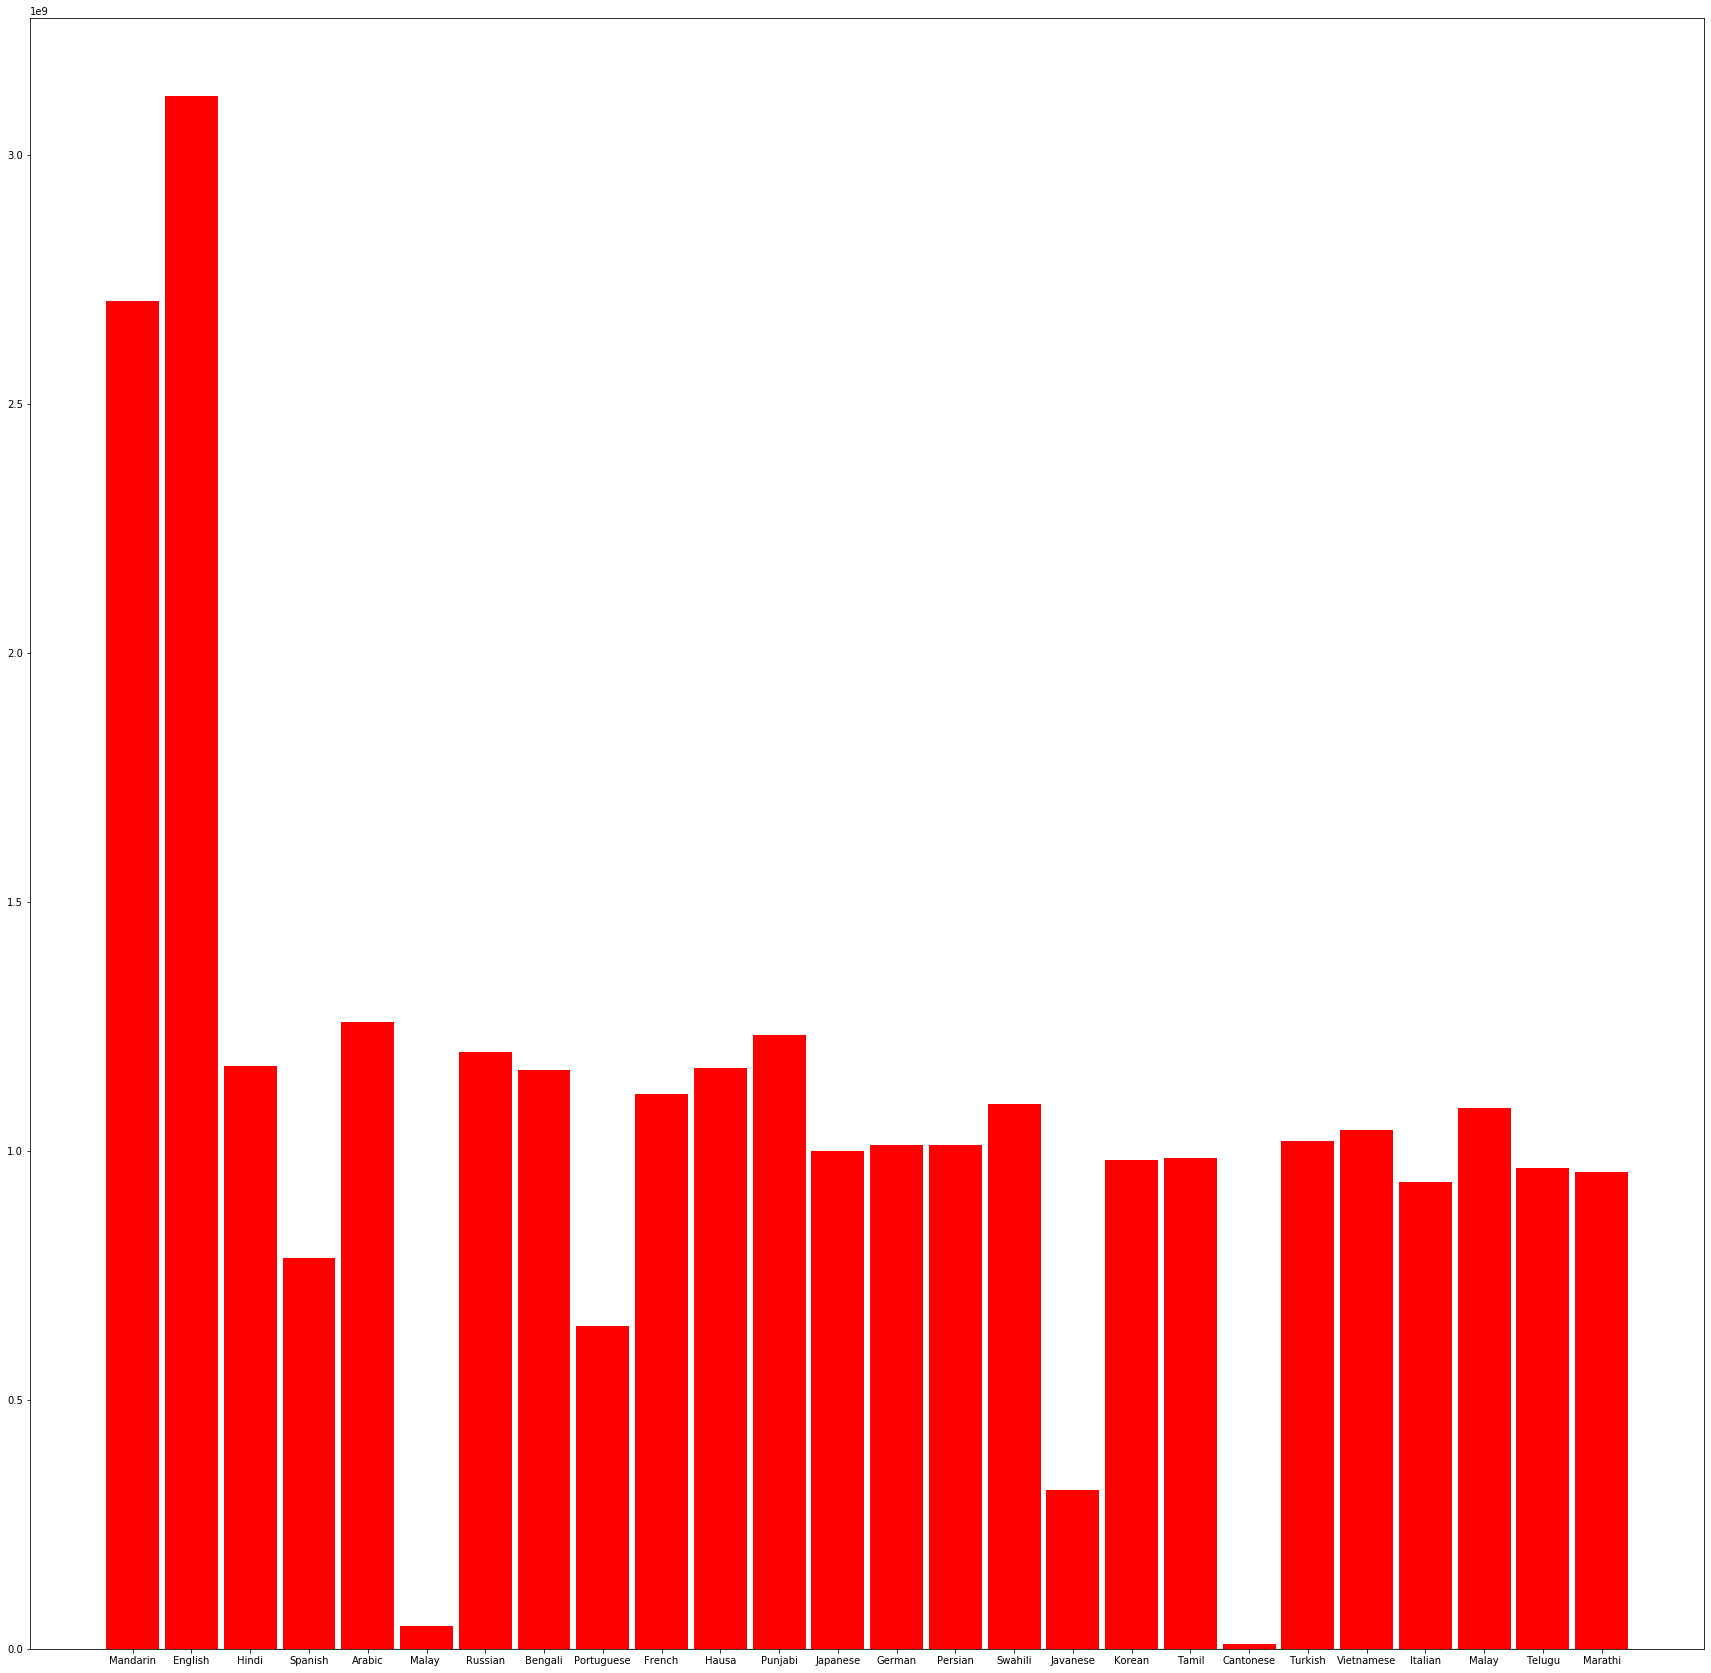

In [68]:
plt.figure(figsize=(30,30))
plt.bar(overall_speakers_in_50_years.keys(), overall_speakers_in_50_years.values(), width=.9, color='r')

In [75]:
inlist = list(overall_speakers_in_50_years.items())
def sortSecond(val): 
    return val[1]  
inlist.sort(key = sortSecond, reverse=True)

In [76]:
print(inlist)

[('English', 3118279520.618959), ('Mandarin', 2706567084.94534), ('Arabic', 1257554328.3317084), ('Punjabi', 1232009067.4759033), ('Russian', 1197931197.3845325), ('Hindi', 1169473419.3832417), ('Hausa', 1165398304.7389474), ('Bengali', 1161524285.4084945), ('French', 1114823605.9311743), ('Swahili', 1093958965.7933123), ('Malay', 1085937299.426937), ('Vietnamese', 1040864856.0491308), ('Turkish', 1019292633.971541), ('Persian', 1012181830.5823042), ('German', 1012135232.4569265), ('Japanese', 999857661.5848345), ('Tamil', 984529689.3832422), ('Korean', 981357894.741869), ('Telugu', 965474685.3832422), ('Marathi', 956474685.3832422), ('Italian', 937680299.8435993), ('Spanish', 783876304.4695444), ('Portuguese', 648874401.6180644), ('Javanese', 319217685), ('Malay ', 46624092), ('Cantonese', 9066245)]


<BarContainer object of 26 artists>

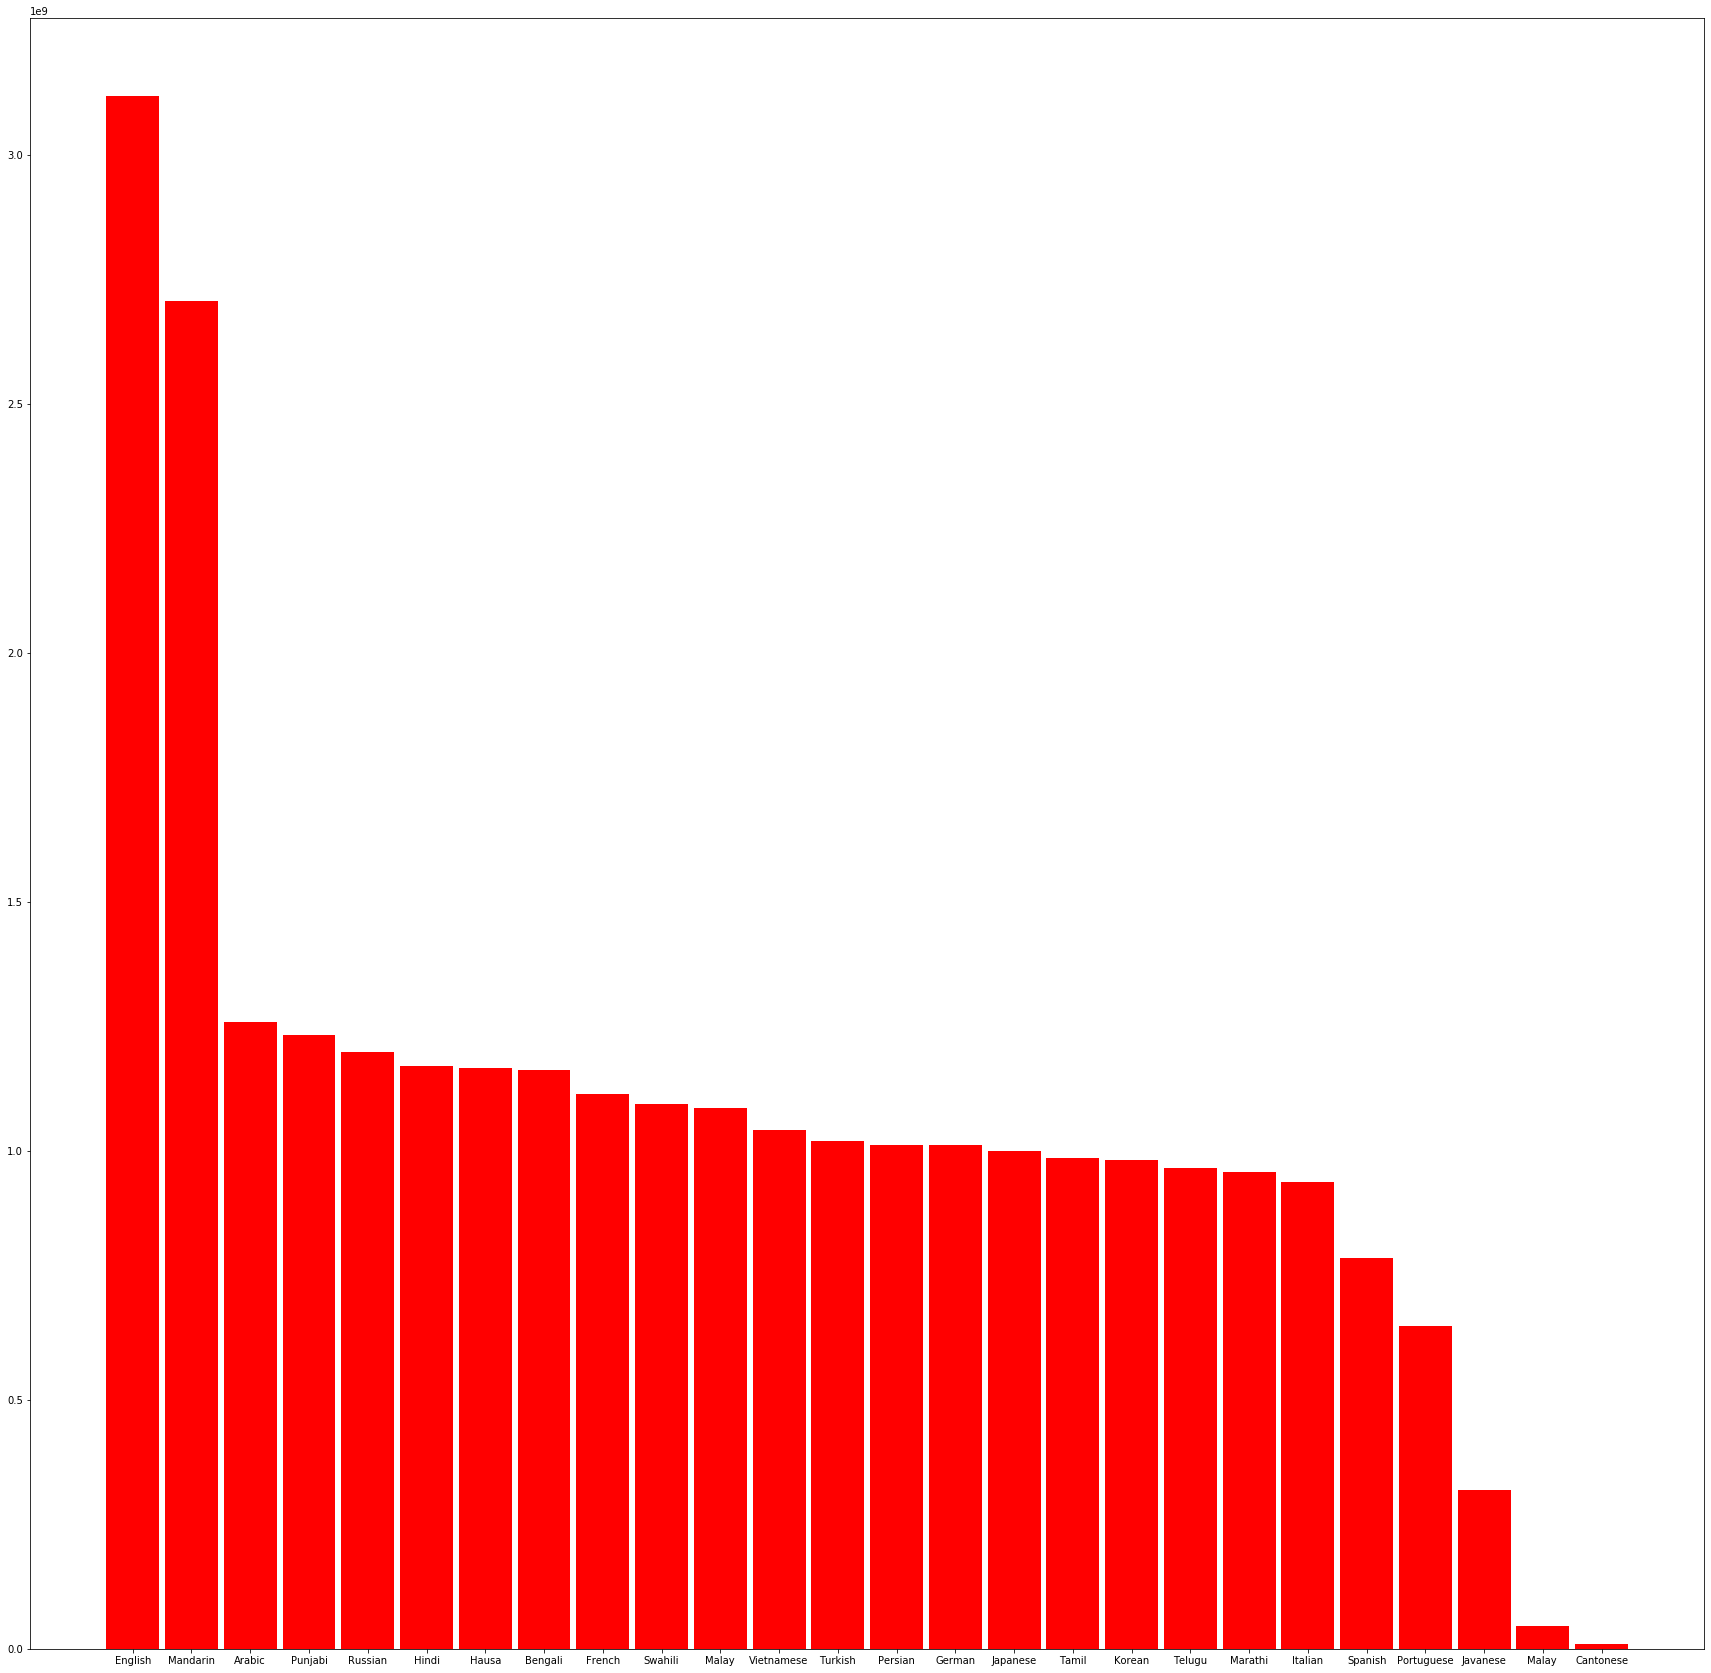

In [77]:
plt.figure(figsize=(30,30))
places = [i[0] for i in inlist]
numbers = [i[1] for i in inlist]
plt.bar(places, numbers, width=.9, color='r')